In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('training.csv')

In [22]:
le_diagnosis = LabelEncoder()
le_sorethroat = LabelEncoder()

In [23]:
data['diagnosis'] = le_diagnosis.fit_transform(data['diagnosis'])
data['sorethroat'] = le_sorethroat.fit_transform(data['sorethroat'])

In [24]:
X = data[['incubation', 'sorethroat', 'temperature']]
y = data['diagnosis']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = Sequential([
    Dense(1, input_shape=(3,), activation='sigmoid')  # 3 input features, 1 output
])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2076 - loss: 3.3914 - val_accuracy: 0.3333 - val_loss: 3.2322
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2049 - loss: 3.4203 - val_accuracy: 0.2778 - val_loss: 3.0802
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1238 - loss: 3.2028 - val_accuracy: 0.2222 - val_loss: 2.9544
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0938 - loss: 2.9612 - val_accuracy: 0.1111 - val_loss: 2.8579
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0650 - loss: 3.1358 - val_accuracy: 0.0556 - val_loss: 2.7640
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0419 - loss: 2.7184 - val_accuracy: 0.0556 - val_loss: 2.6846
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0442 - loss: 2.7990 - val_accuracy: 0.0556 - val_loss: 2.6067
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0186 - loss: 2.6284 - val_accuracy: 0.0556 - 

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9852 - loss: 0.3125 
Test accuracy: 0.9777777791023254


In [32]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 


In [33]:
predicted_labels = le_diagnosis.inverse_transform(y_pred_class.flatten())

In [35]:
new_data = pd.DataFrame({'incubation': [3], 'sorethroat': [1], 'temperature': [39]})
new_pred = model.predict(new_data)
new_pred_class = (new_pred > 0.5).astype(int)
predicted_label = le_diagnosis.inverse_transform(new_pred_class.flatten())

print('Predicted diagnosis for the new data:', predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted diagnosis for the new data: G


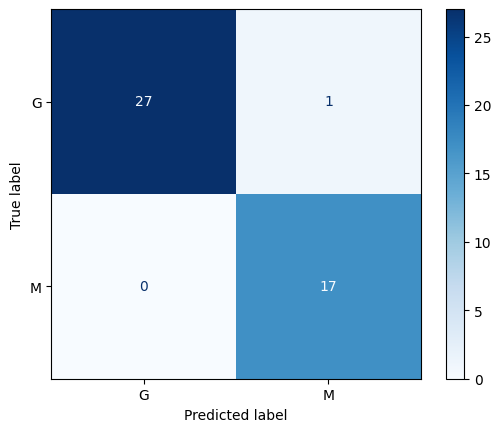

In [41]:
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_diagnosis.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [43]:
model.save('measles_diagnosis_model.keras')